In [19]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import duckdb

## Mass Loss Data

In [32]:
mass_lost_df = pd.read_csv('masslost_new.csv')
mass_lost_df = mass_lost_df.drop(['Lab (T/W)','ln (Corr Prop Initial Dry Mass)'], axis=1)
mass_lost_df = mass_lost_df.rename({'Leaf Species':'Species', '# Days in Stream':'Days', 'Rebar #':'Replicate', 
                                    'Initial Dry Mass (g)':'Initial_Mass','Final Dry Mass (g)':'Final_Mass',
                                    'Proportion of Initial Dry Mass (Uncorrected)': 'Proportion',
                                    'Handling Correction Factor':'Correction_Factor',
                                    'Corrected Proportion Initial Dry Mass':'Corrected_Proportion'}, axis=1)
mass_lost_df

,Species,Days,Treatment,Replicate,Initial_Mass,Final_Mass,Proportion,Correction_Factor,Corrected_Proportion
0,American Beech,0,Fine,NaN,NaN,NaN,NaN,NaN,1.000000
1,American Beech,0,Coarse,NaN,NaN,NaN,NaN,NaN,1.000000
2,Eastern Cottonwood,0,Fine,NaN,NaN,NaN,NaN,NaN,1.000000
3,Eastern Cottonwood,0,Coarse,NaN,NaN,NaN,NaN,NaN,1.000000
4,American Beech,42,Fine,2.0,2.99,1.99,0.665552,1.000000,0.665552
5,American Beech,14,Coarse,1.0,3.00,2.45,0.816667,1.203257,0.982660
6,American Beech,14,Coarse,2.0,3.01,2.22,0.737542,1.203257,0.887452
7,American Beech,14,Coarse,3.0,2.97,2.10,0.707071,1.203257,0.850788
8,American Beech,28,Coarse,1.0,3.01,1.87,0.621262,1.203257,0.747539
9,American Beech,28,Coarse,2.0,2.92,1.98,0.678082,1.203257,0.815907


In [33]:
mass_lost_df['ln_Corrected_Proportion'] = np.log(mass_lost_df['Corrected_Proportion'])
mass_lost_df

,Species,Days,Treatment,Replicate,Initial_Mass,Final_Mass,Proportion,Correction_Factor,Corrected_Proportion,ln_Corrected_Proportion
0,American Beech,0,Fine,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
1,American Beech,0,Coarse,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
2,Eastern Cottonwood,0,Fine,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
3,Eastern Cottonwood,0,Coarse,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
4,American Beech,42,Fine,2.0,2.99,1.99,0.665552,1.000000,0.665552,-0.407139
5,American Beech,14,Coarse,1.0,3.00,2.45,0.816667,1.203257,0.982660,-0.017492
6,American Beech,14,Coarse,2.0,3.01,2.22,0.737542,1.203257,0.887452,-0.119400
7,American Beech,14,Coarse,3.0,2.97,2.10,0.707071,1.203257,0.850788,-0.161592
8,American Beech,28,Coarse,1.0,3.01,1.87,0.621262,1.203257,0.747539,-0.290969
9,American Beech,28,Coarse,2.0,2.92,1.98,0.678082,1.203257,0.815907,-0.203454


In [37]:
sns.set_theme()

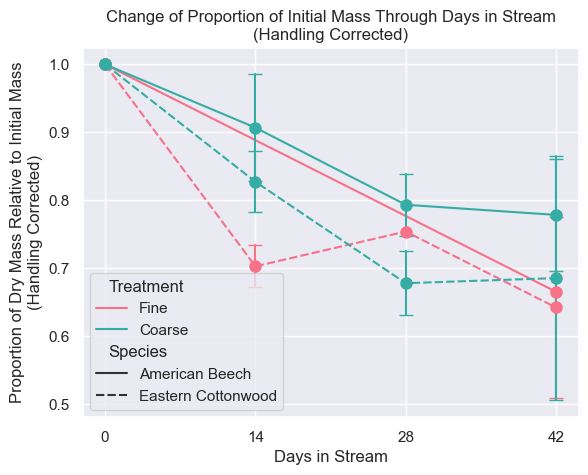

In [180]:
ax = sns.lineplot(data=mass_lost_df, 
                  x='Days', y='Corrected_Proportion', 
                  hue='Treatment', style='Species', palette='husl',
                  err_style="bars", errorbar=("se", 2), err_kws=dict(fmt='o', markersize=8, capsize=5))

ax.set(title='Change of Proportion of Initial Mass Through Days in Stream\n(Handling Corrected)',
       xlabel='Days in Stream', ylabel='Proportion of Dry Mass Relative to Initial Mass\n(Handling Corrected)', 
       xticks=[0,14,28,42])
plt.show;

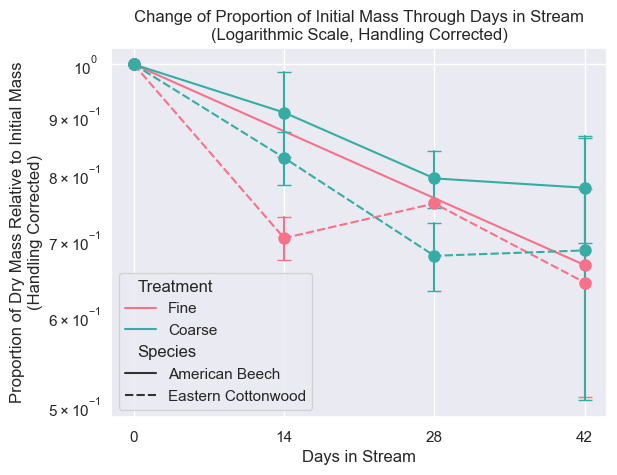

In [179]:
ax = sns.lineplot(data=mass_lost_df, 
                  x='Days', y='Corrected_Proportion', 
                  hue='Treatment', style='Species', palette='husl',
                  err_style="bars", errorbar=("se", 2), err_kws=dict(fmt='o', markersize=8, capsize=5))

ax.set(title='Change of Proportion of Initial Mass Through Days in Stream\n(Logarithmic Scale, Handling Corrected)',
       xlabel='Days in Stream', ylabel='Proportion of Dry Mass Relative to Initial Mass\n(Handling Corrected)',
       yscale='log', xticks=[0,14,28,42])
plt.show;

In [56]:
summarized_df = duckdb.sql("""SELECT Species, Days, Treatment, 
                                    AVG(Corrected_Proportion) AS AVG_Corrected_Proportion, 
                                    AVG(ln_Corrected_Proportion) AS AVG_ln_Corrected_Proportion,
                                    2*STDDEV(Corrected_Proportion)/SQRT(COUNT(Corrected_Proportion)) AS Double_Std_Err, 
                                    2*STDDEV(ln_Corrected_Proportion)/SQRT(COUNT(ln_Corrected_Proportion)) AS Double_ln_Std_Err
                                FROM mass_lost_df
                                GROUP BY Species, Days, Treatment""").df()
summarized_df

,Species,Days,Treatment,AVG_Corrected_Proportion,AVG_ln_Corrected_Proportion,Double_Std_Err,Double_ln_Std_Err
0,American Beech,0,Fine,1.000000,0.000000,NaN,NaN
1,American Beech,0,Coarse,1.000000,0.000000,NaN,NaN
2,Eastern Cottonwood,0,Fine,1.000000,0.000000,NaN,NaN
3,Eastern Cottonwood,0,Coarse,1.000000,0.000000,NaN,NaN
4,American Beech,42,Fine,0.665552,-0.407139,NaN,NaN
5,American Beech,14,Coarse,0.906967,-0.099495,0.078598,0.085545
6,American Beech,28,Coarse,0.793508,-0.232149,0.045974,0.058826
7,American Beech,42,Coarse,0.778591,-0.253080,0.082897,0.105799
8,Eastern Cottonwood,14,Fine,0.702973,-0.352679,0.030947,0.044030
9,Eastern Cottonwood,28,Fine,0.754153,-0.282160,NaN,NaN


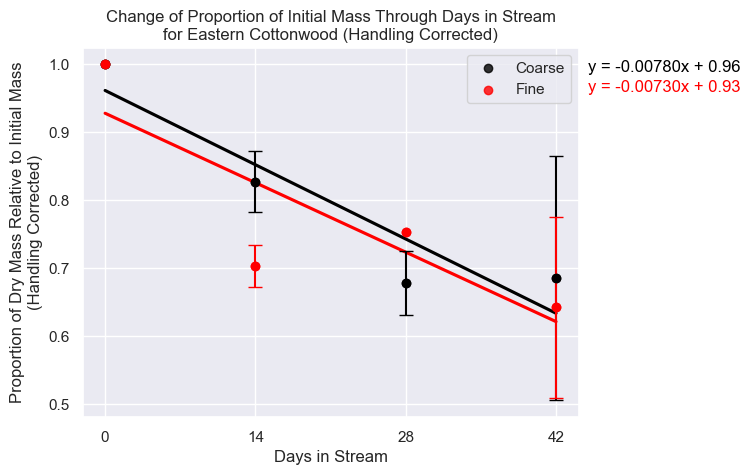

In [226]:
# Calculate regression coefficients for the first dataset
data1 = summarized_df[(summarized_df['Species']=='Eastern Cottonwood') & (summarized_df['Treatment']=='Coarse')]
m1, b1 = np.polyfit(data1['Days'], data1['AVG_Corrected_Proportion'], 1)

# Calculate regression coefficients for the second dataset
data2 = summarized_df[(summarized_df['Species']=='Eastern Cottonwood') & (summarized_df['Treatment']=='Fine')]
m2, b2 = np.polyfit(data2['Days'], data2['AVG_Corrected_Proportion'], 1)


ax = sns.regplot(data=summarized_df[(summarized_df['Species']=='Eastern Cottonwood') & (summarized_df['Treatment']=='Coarse')], 
                  x='Days', y='AVG_Corrected_Proportion', color='black', ci=None, label='Coarse')
ax = sns.regplot(data=summarized_df[(summarized_df['Species']=='Eastern Cottonwood') & (summarized_df['Treatment']=='Fine')], 
                  x='Days', y='AVG_Corrected_Proportion', color='red', ci=None, label='Fine')

plt.errorbar(data1['Days'], data1['AVG_Corrected_Proportion'], yerr=data1['Double_Std_Err'], fmt='o', color='black', capsize=5)
plt.errorbar(data2['Days'], data2['AVG_Corrected_Proportion'], yerr=data2['Double_Std_Err'], fmt='o', color='red', capsize=5)


ax.set(title='Change of Proportion of Initial Mass Through Days in Stream\nfor Eastern Cottonwood (Handling Corrected)',
       xlabel='Days in Stream', ylabel='Proportion of Dry Mass Relative to Initial Mass\n(Handling Corrected)',
       xticks=[0,14,28,42]
      )
ax.legend()

ax.text(s=f"y = {m1:.5f}x + {b1:.2f}", color="black", x=45, y=0.99)
ax.text(s=f"y = {m2:.5f}x + {b2:.2f}", color="red", x=45, y=0.96)

plt.show;

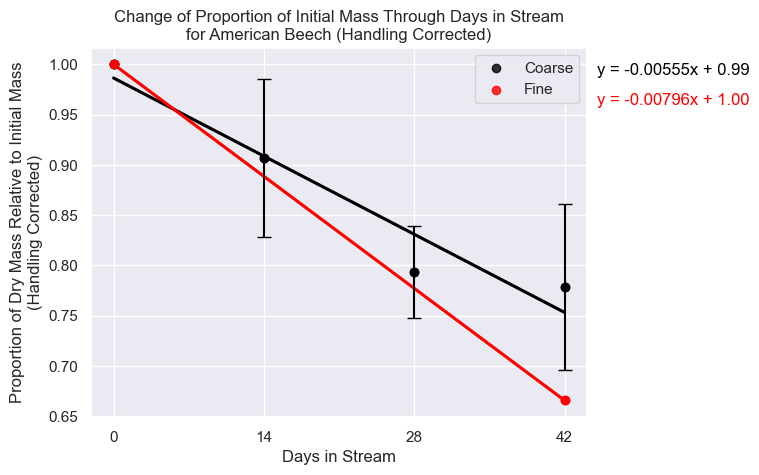

In [225]:
# Calculate regression coefficients for the first dataset
data1 = summarized_df[(summarized_df['Species']=='American Beech') & (summarized_df['Treatment']=='Coarse')]
m1, b1 = np.polyfit(data1['Days'], data1['AVG_Corrected_Proportion'], 1)

# Calculate regression coefficients for the second dataset
data2 = summarized_df[(summarized_df['Species']=='American Beech') & (summarized_df['Treatment']=='Fine')]
m2, b2 = np.polyfit(data2['Days'], data2['AVG_Corrected_Proportion'], 1)


ax = sns.regplot(data=summarized_df[(summarized_df['Species']=='American Beech') & (summarized_df['Treatment']=='Coarse')], 
                  x='Days', y='AVG_Corrected_Proportion', color='black', ci=None, label='Coarse')
ax = sns.regplot(data=summarized_df[(summarized_df['Species']=='American Beech') & (summarized_df['Treatment']=='Fine')], 
                  x='Days', y='AVG_Corrected_Proportion', color='red', ci=None, label='Fine')

plt.errorbar(data1['Days'], data1['AVG_Corrected_Proportion'], yerr=data1['Double_Std_Err'], fmt='o', color='black', capsize=5)
plt.errorbar(data2['Days'], data2['AVG_Corrected_Proportion'], yerr=data2['Double_Std_Err'], fmt='o', color='red', capsize=5)


ax.set(title='Change of Proportion of Initial Mass Through Days in Stream\nfor American Beech (Handling Corrected)',
       xlabel='Days in Stream', ylabel='Proportion of Dry Mass Relative to Initial Mass\n(Handling Corrected)',
       xticks=[0,14,28,42]
      )
ax.legend()

ax.text(s=f"y = {m1:.5f}x + {b1:.2f}", color="black", x=45, y=0.99)
ax.text(s=f"y = {m2:.5f}x + {b2:.2f}", color="red", x=45, y=0.96)

plt.show;

## Invertebrate Data

In [188]:
invert_df = pd.read_csv('invert.csv')
invert_df['Days'] = invert_df['Week'] * 7
invert_df = invert_df.drop(['Group','Lab', 'Week'], axis=1)
invert_df

,Species,Treatment,Replicate,Order,Family,Genus,FFG,Count,Days
0,american beech,C,1,Diptera,Tipulidae,Antocha,CG,5,14
1,american beech,C,1,Ephemeroptera,Baetidae,Baetis,CG,1,14
2,american beech,C,1,Ephemeroptera,Ephemerellidae,Drunella,SC,2,14
3,american beech,C,1,Trichoptera,Hydropsychidae,Hydropsyche,CF,4,14
4,american beech,C,2,Ephemeroptera,Heptageniidae,Stenacron,SC,1,14
...,...,...,...,...,...,...,...,...,...
82,eastern cottonwood,F,1,Trichoptera,Hydropsychidae,Hydropsyche,CF,6,42
83,eastern cottonwood,F,2,Diptera,Chironomidae,(no need to ID),"Many CG, Some P",2,42
84,eastern cottonwood,F,2,Ephemeroptera,Heptageniidae,Stenacron,SC,7,42
85,eastern cottonwood,F,2,Plecoptera,Chloroperlidae,Haploperla,P,3,42


In [189]:
invert_df['FFG'].unique()

array(['CG', 'SC', 'CF', 'Many CG, Some P', 'P', 'SH'], dtype=object)

In [190]:
def FFG_reclass(original):
    if original == 'Many CG, Some P':
        return 'P'
    else:
        return original
invert_df['FFG']=invert_df['FFG'].apply(FFG_reclass)
invert_df

,Species,Treatment,Replicate,Order,Family,Genus,FFG,Count,Days
0,american beech,C,1,Diptera,Tipulidae,Antocha,CG,5,14
1,american beech,C,1,Ephemeroptera,Baetidae,Baetis,CG,1,14
2,american beech,C,1,Ephemeroptera,Ephemerellidae,Drunella,SC,2,14
3,american beech,C,1,Trichoptera,Hydropsychidae,Hydropsyche,CF,4,14
4,american beech,C,2,Ephemeroptera,Heptageniidae,Stenacron,SC,1,14
...,...,...,...,...,...,...,...,...,...
82,eastern cottonwood,F,1,Trichoptera,Hydropsychidae,Hydropsyche,CF,6,42
83,eastern cottonwood,F,2,Diptera,Chironomidae,(no need to ID),P,2,42
84,eastern cottonwood,F,2,Ephemeroptera,Heptageniidae,Stenacron,SC,7,42
85,eastern cottonwood,F,2,Plecoptera,Chloroperlidae,Haploperla,P,3,42


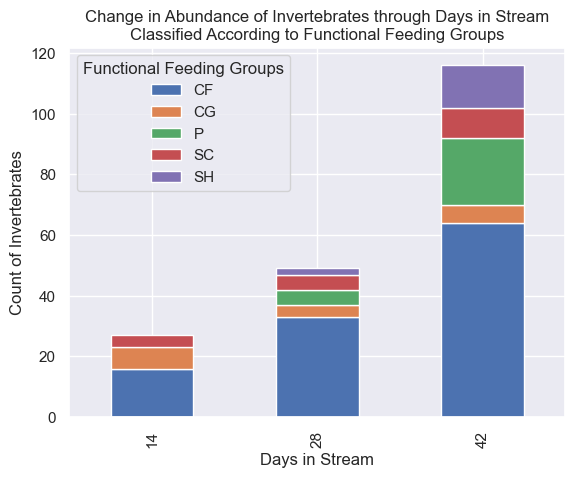

In [176]:
data = invert_df[invert_df['Treatment']=='C']

# Create a pivot table for the data
pivot_data = data.pivot_table(index='Days', columns='FFG', values='Count', aggfunc='sum', fill_value=0)

# Plotting
ax = pivot_data.plot(kind='bar', stacked=True)

# Set titles and labels
ax.set_title('Change in Abundance of Invertebrates through Days in Stream\nClassified According to Functional Feeding Groups')
ax.set_xlabel('Days in Stream')
ax.set_ylabel('Count of Invertebrates')
ax.legend(title='Functional Feeding Groups')

plt.show()

In [228]:
"""
ax = sns.barplot(data=invert_df[invert_df['Treatment']=='F'], 
                 x='Days', y='Count', hue='FFG', 
                 palette='deep', 
                 estimator='sum', errorbar=None
                )
ax.legend(title='Functional Feeding Groups')
ax.set(title='Change in Abundance of Invertebrates through Days in Stream\nClassified According to Functional Feeding Groups',
       xlabel='Days in Stream', ylabel='Count of Invertebrates')
plt.show()
"""

"\nax = sns.barplot(data=invert_df[invert_df['Treatment']=='F'], \n                 x='Days', y='Count', hue='FFG', \n                 palette='deep', \n                 estimator='sum', errorbar=None\n                )\nax.legend(title='Functional Feeding Groups')\nax.set(title='Change in Abundance of Invertebrates through Days in Stream\nClassified According to Functional Feeding Groups',\n       xlabel='Days in Stream', ylabel='Count of Invertebrates')\nplt.show()\n"

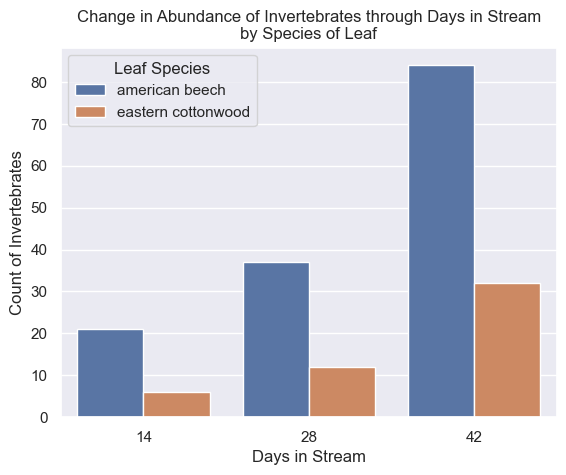

In [184]:
ax = sns.barplot(data=invert_df[invert_df['Treatment']=='C'], 
                 x='Days', y='Count', hue='Species', 
                 palette='deep', 
                 estimator='sum', errorbar=None
                )
ax.legend(title='Leaf Species')
ax.set(title='Change in Abundance of Invertebrates through Days in Stream\nby Species of Leaf',
       xlabel='Days in Stream', ylabel='Count of Invertebrates')
plt.show()

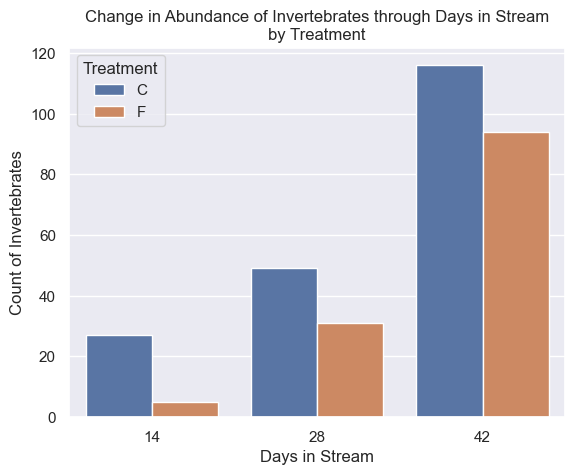

In [224]:
ax = sns.barplot(data=invert_df, 
                 x='Days', y='Count', hue='Treatment', 
                 palette='deep', 
                 estimator='sum', errorbar=None
                )
ax.legend(title='Treatment')
ax.set(title='Change in Abundance of Invertebrates through Days in Stream\nby Treatment',
       xlabel='Days in Stream', ylabel='Count of Invertebrates')
plt.show()

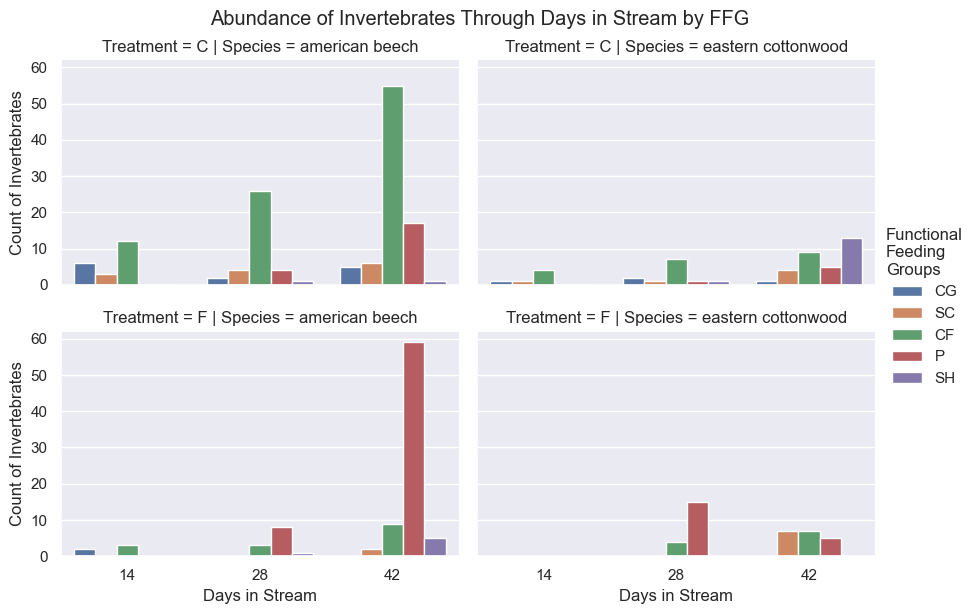

In [265]:
# To ensure that all days are represented, we need to verify the data and potentially set the order of 'Days'
day_order = sorted(invert_df['Days'].unique())

# Recreating the facet grid with specified day order
g = sns.FacetGrid(data=invert_df, col='Species', row='Treatment', height=3, aspect=1.5)
g.map_dataframe(sns.barplot, x='Days', y='Count', hue='FFG', palette='deep', estimator=np.sum, hue_order=hue_order, order=day_order, errorbar=None)

# Adjusting the layout and adding legend
g.tight_layout()
g.set_axis_labels("Days in Stream", "Count of Invertebrates")
g.add_legend(title='Functional\nFeeding\nGroups')
plt.suptitle("Abundance of Invertebrates Through Days in Stream by FFG", y=1.02)

# Displaying the plots
plt.show()

In [230]:
invert_genera_richness_df = duckdb.sql("""SELECT Species, Treatment, Days, COUNT(DISTINCT Genus) AS Genera_Richness
                                            FROM invert_df
                                            GROUP BY Species, Treatment, Days""").df()
invert_genera_richness_df

,Species,Treatment,Days,Genera_Richness
0,american beech,C,14,5
1,american beech,F,14,2
2,american beech,C,28,7
3,american beech,F,28,3
4,american beech,C,42,9
5,american beech,F,42,6
6,eastern cottonwood,C,14,4
7,eastern cottonwood,C,28,7
8,eastern cottonwood,F,28,2
9,eastern cottonwood,C,42,10


Text(0.5, 1.02, 'Generic Richness of Invertebrates Through Days in Stream by Treatment')

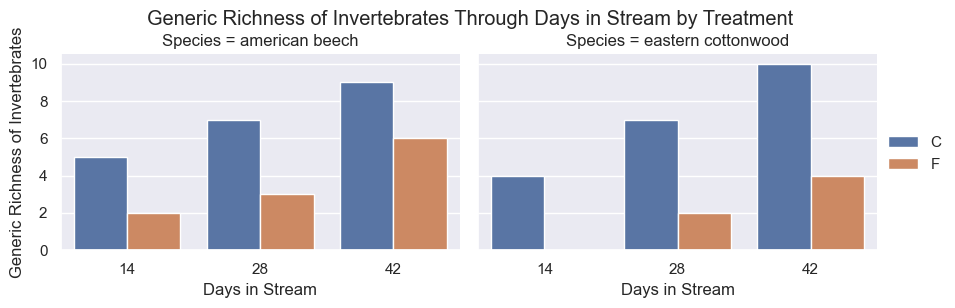

In [266]:
g = sns.FacetGrid(data=invert_genera_richness_df, col='Species', height=3, aspect=1.5)
g.map_dataframe(sns.barplot, x='Days', y='Genera_Richness', hue='Treatment', palette='deep', errorbar=None)

g.tight_layout()
g.set_axis_labels("Days in Stream", "Generic Richness of Invertebrates")
g.add_legend()
plt.suptitle("Generic Richness of Invertebrates Through Days in Stream by Treatment", y=1.02)

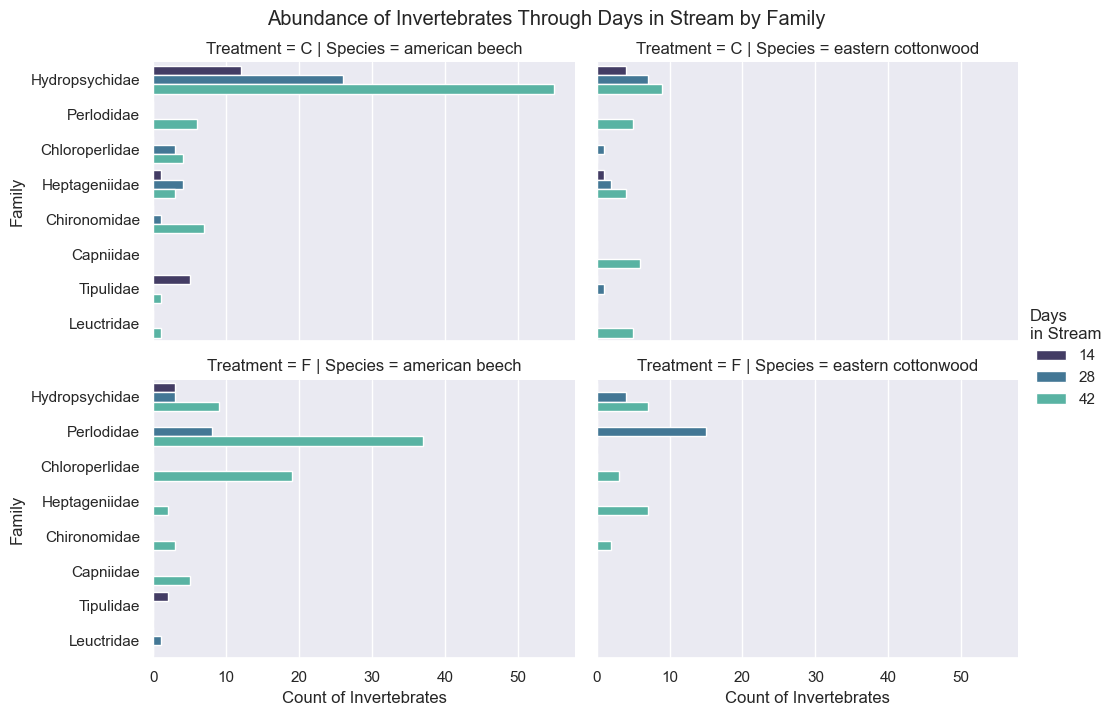

In [264]:
# Step 1: Filter out families with a total count less than 5
filtered_df = invert_df.groupby('Family').filter(lambda x: x['Count'].sum() >= 5)

# Step 2: Order by sum of 'Count' within each 'Family'
# This creates a new DataFrame with the sum of counts for each family
sum_counts = filtered_df.groupby('Family')['Count'].sum().reset_index()

# Sorting the families based on sum of counts in descending order
sorted_families = sum_counts.sort_values('Count', ascending=False)['Family']

# Step 3: Create the barplot
# Using the 'order' parameter to order the bars

g = sns.FacetGrid(data=filtered_df, row='Treatment', col='Species', height=3.5, aspect=1.5)
g.map_dataframe(sns.barplot, data=filtered_df, x='Count', y='Family', 
            orient='h', 
            hue=filtered_df['Days'].astype(str), 
            palette='mako', 
            estimator=np.sum, 
            errorbar=None,
            order=sorted_families)

g.set_axis_labels("Count of Invertebrates", "Family")
plt.suptitle("Abundance of Invertebrates Through Days in Stream by Family", y=1.02)
g.add_legend(title='Days\nin Stream')